<p style="font-size:300%; background-color:pink; color:blue; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Representación de Imágenes</p>
<p style="font-size:240%; background-color:pink; color:red; text-align:center;line-height : 60px; margin : 0; padding : 0;">
Técnicas de Inteligencia Artificial - Visión de Máquina</p1>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> <br>Prof. Daniel Vargas Medina</p>
<p style="font-size:160%; text-align:center; line-height : 20px; margin-top : 0; "> email: davargasme@unal.edu.co</p>
<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>INGENIERIA MECATRONICA</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<br>
<img src="fig/Escudo_UN.png",width=100,height=100>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>28 de abril de 2022</p>

In [15]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)

from scipy import signal
from scipy import misc

from sklearn import neighbors, datasets


OpenCV Version : 4.5.5 


# Structural Analysis and Shape Descriptors

http://docs.opencv.org/3.0-beta/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html
https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html

# cv2.findContours


Contorno
(4, 1, 2)


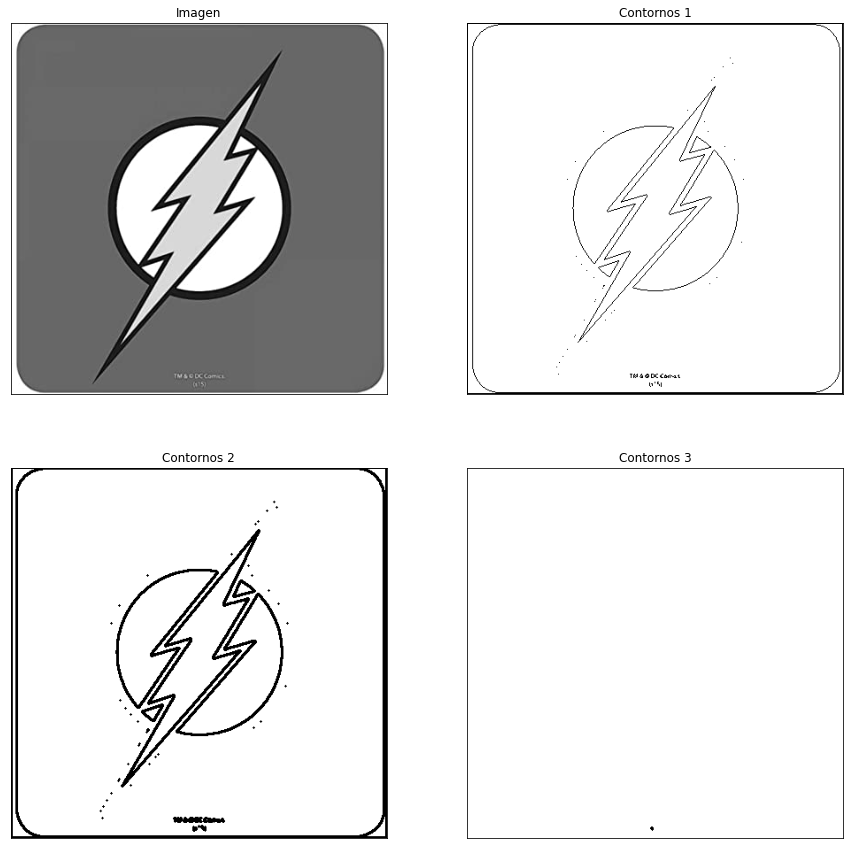

In [16]:
img = cv2.imread('InputImages/flash1.jpg',0)
ret,thresh = cv2.threshold(img,127,255,0)

#Busqueda de los contornos
contours, hierarchy=cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[0]
print ("\nContorno")
print (cnt.shape)

img2 = np.ones(img.shape,np.uint8)
img3 = np.ones(img.shape,np.uint8)
img4 = np.ones(img.shape,np.uint8)

#-----------------------------
#Dibuja contornos
cv2.polylines(img2, contours, 1, (0,0,0))
cv2.drawContours(img3,contours,-1,(0,0,0),2)
Puntos = cnt
cv2.line(img4,(Puntos[Puntos.shape[0]-1,0,0],Puntos[Puntos.shape[0]-1,0,1]),
         (Puntos[0,0,0],Puntos[0,0,1]),(0,0,255),2)
for i in range(Puntos.shape[0]-1):
    cv2.line(img4,(Puntos[i,0,0],Puntos[i,0,1]),(Puntos[i+1,0,0],Puntos[i+1,0,1]),(0,0,255),2)



plt.figure(1,figsize=(15,15))
plt.subplot(221),plt.imshow(img,cmap = 'gray')
plt.title('Imagen'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img2,cmap = 'gray')
plt.title('Contornos 1'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(img3,cmap = 'gray')
plt.title('Contornos 2'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(img4,cmap = 'gray')
plt.title('Contornos 3'), plt.xticks([]), plt.yticks([])

plt.show()

# cv2.arcLength
# cv2.contourArea


Perimetro =  5.414213538169861

Area =  0.5


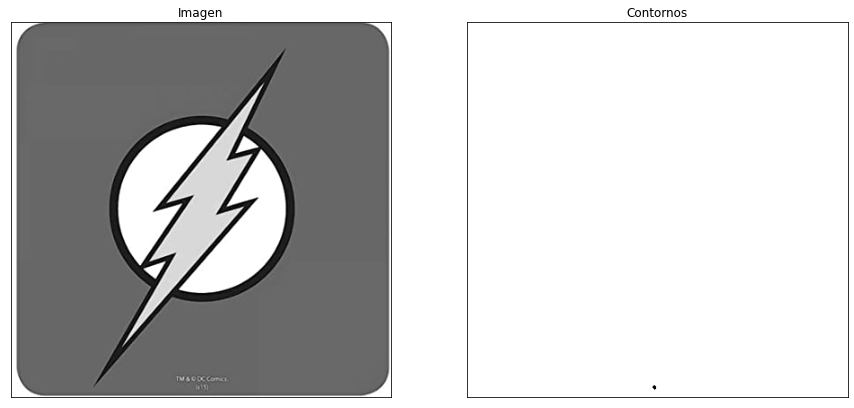

In [17]:
#img = np.ones((400,400),np.uint8)
img1 = np.ones((400,400),np.uint8)

#img[150:250,150:250] = 0
img1[150:250,150:250] = 0

#img[280:319,280:319] = 0
img1[280:319,280:319] = 0

contours,hierarchy = cv2.findContours(img1, 1, 2)

img = cv2.imread('InputImages/flash1.jpg',0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]

#-----------------------------
#MEDIDAS
Perimeto = cv2.arcLength(cnt, 1)
Area = cv2.contourArea(cnt)


print ("\nPerimetro = ", Perimeto)
print ("\nArea = ", Area)


#-----------------------------
#Dibuja contornos
img2 = np.ones(img.shape,np.uint8)
Puntos = cnt
cv2.line(img2,(Puntos[Puntos.shape[0]-1,0,0],Puntos[Puntos.shape[0]-1,0,1]),
         (Puntos[0,0,0],Puntos[0,0,1]),(0,0,255),2)
for i in range(Puntos.shape[0]-1):
    cv2.line(img2,(Puntos[i,0,0],Puntos[i,0,1]),(Puntos[i+1,0,0],Puntos[i+1,0,1]),(0,0,255),2)


plt.figure(1,figsize=(15,15))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Imagen'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2,cmap = 'gray')
plt.title('Contornos'), plt.xticks([]), plt.yticks([])

plt.show()

# cv2.convexHull

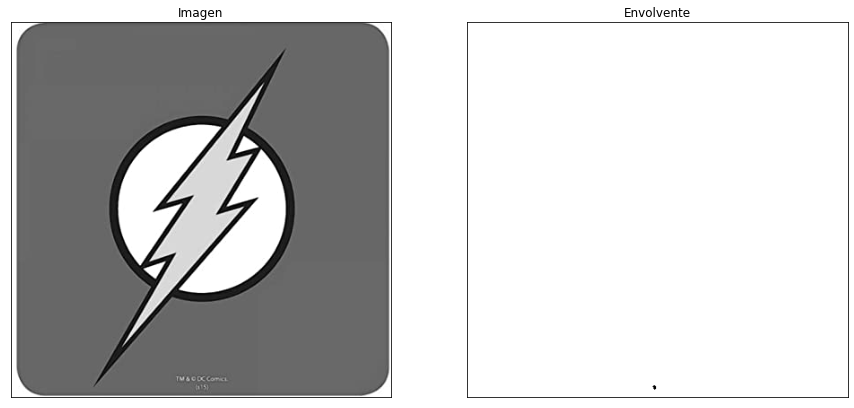

In [18]:
#Convex Hull

hull = cv2.convexHull(cnt)

img2 = np.ones(img.shape,np.uint8)

#-----------------------------
#Dibuja contornos
#cv2.polylines(img2, hull, 1, (0,0,0))
Puntos = hull
cv2.line(img2,(Puntos[Puntos.shape[0]-1,0,0],Puntos[Puntos.shape[0]-1,0,1]),
         (Puntos[0,0,0],Puntos[0,0,1]),(0,0,255),2)
for i in range(Puntos.shape[0]-1):
    cv2.line(img2,(Puntos[i,0,0],Puntos[i,0,1]),(Puntos[i+1,0,0],Puntos[i+1,0,1]),(0,0,255),2)

    
    
plt.figure(1,figsize=(15,15))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Imagen'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2,cmap = 'gray')
plt.title('Envolvente'), plt.xticks([]), plt.yticks([])

plt.show()

In [19]:
hull = cv2.convexHull(cnt,returnPoints = False)

print (hull)
print (hull.shape)

print ("\nIf you check corresponding values in cnt, it will be same as coordinates we have already found. ")
print (cnt[hull[0]])
print (cnt[hull[1]])
print (cnt[hull[2]])

[[3]
 [2]
 [0]]
(3, 1)

If you check corresponding values in cnt, it will be same as coordinates we have already found. 
[[[209 407]]]
[[[209 409]]]
[[[208 407]]]


# cv2.boundingRect
# cv2.minAreaRect

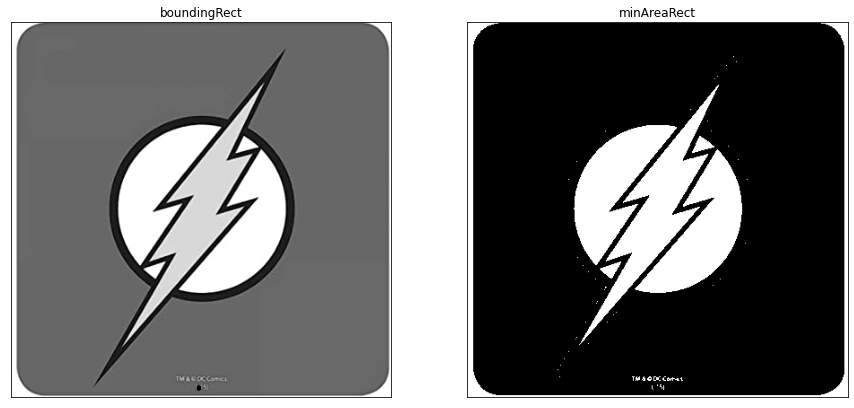

In [20]:
#Bounding Rectangle and Min Area Rectangle: Rotated rectangle where a bounding rectangle is drawn with minimum area.

img = cv2.imread('InputImages/flash1.jpg',0)
img2 = cv2.imread('InputImages/flash1.jpg',0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]

x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(thresh,[box],0,(0,0,0),2)


plt.figure(1,figsize=(15,15))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('boundingRect'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh,cmap = 'gray')
plt.title('minAreaRect'), plt.xticks([]), plt.yticks([])


plt.show()

# cv2.minEnclosingCircle
# cv2.fitEllipse

In [23]:
# Circle y Elipse

img = cv2.imread('InputImages/flash1.jpg',0)
img1 = cv2.imread('InputImages/flash1.jpg',0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]

(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
cv2.circle(img,center,radius,(0,255,0),2)

ellipse = cv2.fitEllipse(cnt)
cv2.ellipse(img1,ellipse,(0,255,0),2)


plt.figure(1,figsize=(15,15))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('minEnclosingCircle'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img1,cmap = 'gray')
plt.title('fitEllipse'), plt.xticks([]), plt.yticks([])

plt.show()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\shapedescr.cpp:360: error: (-201:Incorrect size of input array) There should be at least 5 points to fit the ellipse in function 'cv::fitEllipseNoDirect'


# Moments

http://docs.opencv.org/2.4.13.2/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html?highlight=cv2.moments#cv2.moments


http://docs.opencv.org/3.1.0/dd/d49/tutorial_py_contour_features.html

In [ ]:
img = cv2.imread('InputImages/flash1.jpg',0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

print (img.shape)

cnt = contours[0]
M = cv2.moments(cnt)

print ("\nMomentos")
print (M)


print ("\nMometos Espaciales:")
print ("m00 = ", M['m00'])
print ("m10 = ", M['m10'])
print ("m10 = ", M['m01'])
print ("m20 = ", M['m20'])
print ("m11 = ", M['m11'])
print ("m02 = ", M['m02'])
print ("m30 = ", M['m30'])
print ("m21 = ", M['m21'])
print ("m12 = ", M['m12'])
print ("m03 = ", M['m03'])

print ("\nMometos Centrales:")
print ("mu20 = ", M['mu20'])
print ("mu11 = ", M['mu11'])
print ("mu02 = ", M['mu02'])
print ("mu30 = ", M['mu30'])
print ("mu21 = ", M['mu21'])
print ("mu12 = ", M['mu12'])
print ("mu03 = ", M['mu03'])

print ("\nMometos Centrales Normalizados:")
print ("nu20 = ", M['nu20'])
print ("nu11 = ", M['nu11'])
print ("nu02 = ", M['nu02'])
print ("nu30 = ", M['nu30'])
print ("nu21 = ", M['nu21'])
print ("nu12 = ", M['nu12'])
print ("nu03 = ", M['nu03'])

(611, 522)

Momentos
{'m00': 5.5, 'm10': 7.166666666666666, 'm01': 3342.333333333333, 'm20': 11.916666666666666, 'm11': 4355.875, 'm02': 2031128.4166666665, 'm30': 22.55, 'm21': 7243.733333333334, 'm12': 2647488.7666666666, 'm03': 1234313717.2, 'mu20': 2.5782828282828287, 'mu11': 0.7133838383842885, 'mu02': 2.5782828284427524, 'mu30': 0.30306091215182107, 'mu21': 0.15198959289864433, 'mu12': -0.15198959329758166, 'mu03': -0.30306077003479004, 'nu20': 0.0852324901911679, 'nu11': 0.023582936806092185, 'nu02': 0.08523249019645462, 'nu30': 0.004271920897200197, 'nu21': 0.002142432402286848, 'nu12': -0.0021424324079102348, 'nu03': -0.004271918893930589}

Mometos Espaciales:
m00 =  5.5
m10 =  7.166666666666666
m10 =  3342.333333333333
m20 =  11.916666666666666
m11 =  4355.875
m02 =  2031128.4166666665
m30 =  22.55
m21 =  7243.733333333334
m12 =  2647488.7666666666
m03 =  1234313717.2

Mometos Centrales:
mu20 =  2.5782828282828287
mu11 =  0.7133838383842885
mu02 =  2.5782828284427524
mu30 =  

# cv2.HuMoments

http://docs.opencv.org/3.0-beta/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html#humoments

In [ ]:
img = cv2.imread('InputImages/flash1.jpg',0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)


cnt = contours[0]
M = cv2.moments(cnt)
Hu = cv2.HuMoments(M)

print ("\nMomentos de Hu")
print ("Hu(1) = ", Hu[0])
print ("Hu(2) = ", Hu[1])
print ("Hu(3) = ", Hu[2])
print ("Hu(4) = ", Hu[3])
print ("Hu(5) = ", Hu[4])
print ("Hu(6) = ", Hu[5])
print ("Hu(7) = ", Hu[6])


Momentos de Hu
Hu(1) =  [0.17046498]
Hu(2) =  [0.00222462]
Hu(3) =  [0.00022895]
Hu(4) =  [9.06943394e-06]
Hu(5) =  [-4.13273227e-10]
Hu(6) =  [-4.27767775e-07]
Hu(7) =  [6.20545311e-16]


# OTROS

In [ ]:
#Centroide

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print ("\ncx")
print (cx)
print ("\ncy")
print (cy)


cx
1

cy
607
